#### Whats Cookie and Session? 

* Session

A session creates a file in a temporary directory on the server where registered session variables and their values are stored. This data will be available to all pages on the site during that visit.

A session ends when the user closes the browser or after leaving the site, the server will terminate the session after a predetermined period of time, commonly 30 minutes duration.

* Cookies

Cookies are text files stored on the client computer and they are kept of use tracking purpose. Server script sends a set of cookies to the browser. For example name, age, or identification number etc. The browser stores this information on a local machine for future use.

When next time browser sends any request to web server then it sends those cookies information to the server and server uses that information to identify the user.
(ref: https://www.tutorialspoint.com/What-is-the-difference-between-session-and-cookies)


* But then why Session?

Cookies are stored locally. That is, there is a potential that an user malificially transfrom the cookies and send signal to a server. If one could manipulate a local cookie so that a server would recognize it as a the person is log in, then the person could act like another user or admin. To prevent this issue, we use session. 

Session will provide a session-id (string) to a clients browser when the browser requests in the server. In case of connection failure between an user and the server, it utilizes memory cookies which will be termiated in future. 

In [1]:
import requests
from bs4 import BeautifulSoup as bs

# session 
s = requests.Session() 
# this replace requests

In [2]:
import requests 

s = requests.Session()

req = s.get('https://www.clien.net/service/')

html = req.text
header = req.headers; print(header)
status = req.status_code; print(status)
is_ok = req.ok; print(is_ok)

{'Date': 'Fri, 17 Apr 2020 02:48:52 GMT', 'Content-Type': 'text/html;charset=UTF-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Server': 'PWS/8.3.1.0.8', 'Set-Cookie': 'SCOUTER=z4oifhuka2mhj4; Expires=Wed, 05-May-2088 06:02:59 GMT; Path=/, SCOUTER=x6pua3h4mhp5l6; Expires=Wed, 05-May-2088 06:02:59 GMT; Path=/, SESSION=cd829e2e-b6ee-4a2f-81f2-c8aa27811378; Path=/service/; HttpOnly', 'X-Content-Type-Options': 'nosniff, nosniff', 'X-XSS-Protection': '1; mode=block', 'Cache-Control': 'no-cache, no-store, max-age=0, must-revalidate', 'Pragma': 'no-cache', 'Expires': '0', 'X-Frame-Options': 'DENY, DENY', 'Content-Language': 'ko-KR', 'Content-Encoding': 'gzip', 'Strict-Transport-Security': 'max-age=63072000; includeSubDomains; preload', 'Via': '1.1 PSmgnyNY2pa91:0 (W)', 'X-Px': 'ms PSmgnyNY2pa91JFK(origin)', 'X-Ws-Request-Id': '5e991914_PSmgnyNY2pa91_31437-6987'}
200
True


In [3]:
is_ok

True

In the input field, name = _csrf, userID, userPassword, remember-me
Also, onclikc = auth.login() kicks off before

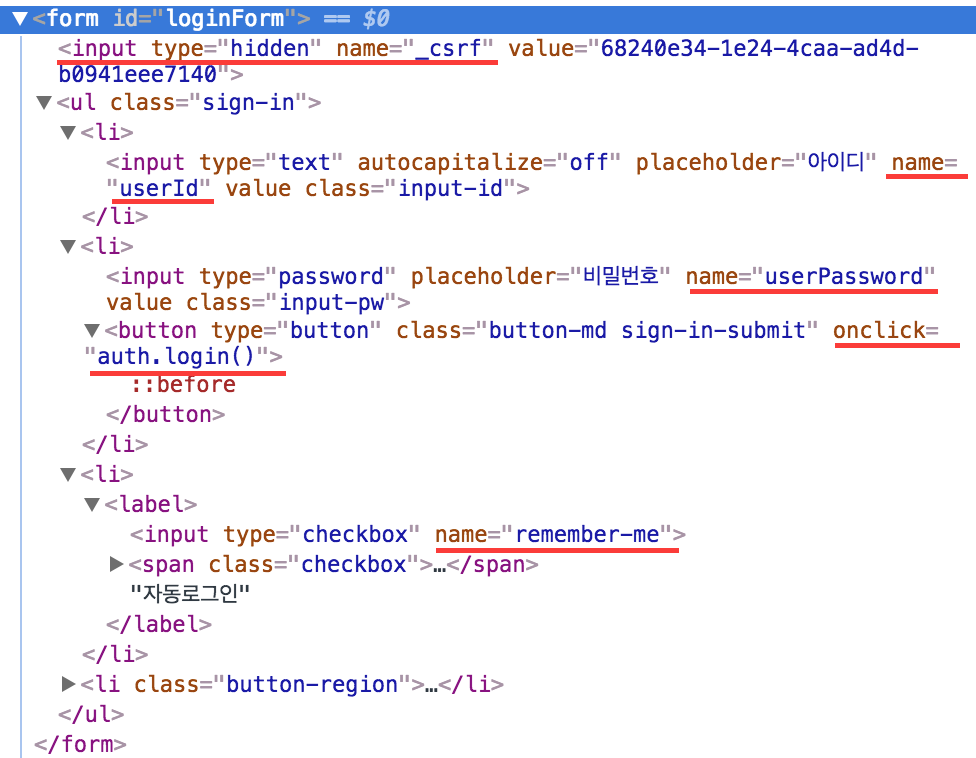

HTML form Field normally use ''post method'' for name: xxx and Key:Value

In this example, the web uses userID:id and userPassword:pw

Here, _csrf is a protection tool that prevents, or filters, a malificous usage such as hacking. 
If _csrf is not carried with requests then it automatically takes it as mal-request and reject the requests.
This improves the stabiity of a web. Also, it changes everytime refreshes.
That is, for the webs that use _csrf, I should use _csrf as well to login.


* auth.login()

In [4]:
# this is javascript code

function Auth() {
    var _this = this; // _this에 Auth라는 함수를 넣었습니다.
    _this.env = {};
    _this.env.form = $('#loginForm'); // 로그인 폼입니다. id, pw, _csrf 등을 받는다고 위에서 확인했죠?
    _this.env.iptUserId = _this.env.form.find('*[name=userId]'); // 사용자가 폼에 입력한 ID입니다.
    _this.env.iptUserPassWord = _this.env.form.find('*[name=userPassword]'); // 사용자가 폼에 입력한 PW입니다.

    _this.loginValidate = function() {
        var isValid = true; // 아무 문제가 없다면(id나 pw가 빈칸이 아니라면) true를 반환하는 함수입니다.
        if (_this.env.iptUserId.val().trim() == '') { // 아이디가 빈칸이면 false죠?
            alert('아이디를 입력하세요.');
            _this.env.iptUserId.focus();
            isValid = false;
            return isValid;
        }
        if (_this.env.iptUserPassWord.val().trim() == '') { // 비번이 빈칸이어도 false가 됩니다.
            alert('비밀번호를 입력하세요.');
            _this.env.iptUserPassWord.focus();
            isValid = false;
            return isValid;
        }
        return isValid;
    };

    _this.login = function() {
        var isValid = _this.loginValidate(); // 방금 본 아이디/비번이 빈칸인지 확인하기
        if (isValid) { // 빈칸이 아니라면 ->
            _this.env.form.attr({ // 폼 속성을 정의해 줍시다.
                method: 'POST', // 폼 전송 방식은 'POST'이고,
                action: BASE_URL + '/login' // 폼 전송하는 주소는 https://www.clien.net/service/login 이네요!
            });
            _this.env.form.submit(); // 진짜로 폼을 전송해줍니다.
        }
    };
}

SyntaxError: invalid syntax (<ipython-input-4-58672ab3b66f>, line 3)

In [5]:
import requests

login_info = {
    'userId':'xxxx', 
    'userPassword':'xxxxx'
}

# creating session
with requests.Session() as s:
    login_req = s.post('https://www.clien.net/service/login', data=login_info)
    print(login_req.status_code)

404


Above fails because of _csrf

In [6]:
#updating session with _csrf
with requests.Session() as s:
    # get to the page
    first_page = s.get('https://www.clien.net/service')
    html = first_page.text
    soup = bs(html, 'html.parser')
    # among inputs look for _csrf in names
    csrf = soup.find('input', {'name' : '_csrf'})
    # print the value
    print(csrf['value'])
    
    # put the csrf into login info (** unpacking the two dictionaries)
    login_info = {**login_info, **{'_csrf':csrf['value']}}
    print(login_info)  
    
    # try login again
    login_req = s.post('https://www.clien.net/service/login', data=login_info)
    print(login_req.status_code)

fa999ab3-f6ad-43d0-a65b-c59b3abf2b30
{'userId': 'xxxx', 'userPassword': 'xxxxx', '_csrf': 'fa999ab3-f6ad-43d0-a65b-c59b3abf2b30'}
200


In [7]:
# parser.py
import requests
from bs4 import BeautifulSoup as bs

LOGIN_INFO = {
    'userId': 'myidid',
    'userPassword': 'mypassword123'
}

# Session
with requests.Session() as s:

    first_page = s.get('https://www.clien.net/service')
    html = first_page.text
    soup = bs(html, 'html.parser')
    csrf = soup.find('input', {'name': '_csrf'}) 
    print(csrf['value']) 

    
    LOGIN_INFO = {**LOGIN_INFO, **{'_csrf': csrf['value']}}
    print(LOGIN_INFO)

    login_req = s.post('https://www.clien.net/service/login', data=LOGIN_INFO)
    print(login_req.status_code) # 200 if succeed
    if login_req.status_code != 200:
        raise Exception('Failed ! Try again')

    # -- NOW IT STAYS LOGIN --

c900f8bb-3324-4154-95ac-dcad1558fbe6
{'userId': 'myidid', 'userPassword': 'mypassword123', '_csrf': 'c900f8bb-3324-4154-95ac-dcad1558fbe6'}
200


In [8]:
# get an article 
post_one = s.get('https://www.clien.net/service/board/rule/10707408')
soup = bs(post_one.text, 'html.parser') 

title = soup.select('#div_content.content_view div.post_view div.post_content') #.post_content > article
contents = soup.select('#div_content.content_view div.post_view div.post_content article div.post_article.fr-view')

In [9]:
print(title[0].text) 
print(contents[0].text) 







 회원중고장터 게시판은 회원간의 중고 제품 거래를 위한 게시판입니다.
거래시 직거래 또는 안전거래사이트( http://www.unicro.co.kr 등)를 이용하여 장터사기를 미연에 방지하시기 바랍니다.
거래전 사기피해 정보사이트( http://www.thecheat.co.kr )를 검색하여주시기 바랍니다.

회원중고장터는 

가입일 : 200일 이상
로그인 : 80회 이상
게시물수 : 20개 이상
댓글수 : 100개 이상

을 만족하여야 거래게시물을 등록하실 수 있습니다.

0. 사이트 이용규칙을 준수합니다.

1. 게시물 등록시 아래 규칙을 준수합니다.
(1) 전문 업자의 활동을 금지합니다.

전문적인 판매 또는 구매를 위한 활동이 확인되는 경우 게시물은 삭제되며, 작성자는 이용이 제한될 수 있습니다.

(2) 장터 양식을 빠짐없이 입력해야 합니다.

기재사항을 누락하거나, 양식을 임의로 변경해서는 안됩니다.
거래자정보가 입력되지 않거나 가격이 입력되지 않는 게시물 또는 경매성 게시물은 올릴 수 없습니다.
모바일 기기 등으로 게시물 등록할 경우도 양식은 반드시 입력되어야 합니다.

(3) 거래사고 발생 가능성이 높은 쿠폰, 가상화폐, 대리구매, 온라인게임 계정이나 아이템의 거래를 금지합니다.
(4) 시세보다 비싸다는 댓글, 판매가격보다 싼 물품의 링크 등 불필요한 가격시비를 하지 않습니다.
2. 아래의 상품은 관련법에 의해 거래가 금지됩니다.

군용품 (총포류, 대검류)
이미테이션 물품
발행자가 비매품으로 발행했거나 통신판매 등을 통해 전매를 금지한 철도 승차권, 사용제한 상품권 등 유가증권
유통검정이나 검사를 통과하지 못한 공산품
알콜 1도 이상의 주류
모든 담배
의약품 및 의료기기
건강기능식품
성인용품
허위 또는 과장 광고한 모든 물품
지적재산권 등 개인 또는 법인이나 특정 단체의 권리를 침해하는 물품
방송통신기자재 등의 적합성평가를 받지 않은 품목 (전파법 58조 및 84조 의거)
기타 관계법령에 저촉되는 물품













 회원

hmmmm 
failed...?